# Método bisección

In [1]:
from numpy import e
from math import sqrt

def f(x):
    return e**(-x)+x-2
    # return x*sqrt(x+1)

def error_relativo(x_real,x_aprox):
    return abs(x_real-x_aprox)/abs(x_real)

sol_real = -1.14619

In [3]:
x_0 = -2
x_1 = -1

errores_realtivos = []
errores_realtivos_aprox = []

n_iteraciones = 20


for k in range(n_iteraciones):
    x_m = (x_0+x_1)/2
    errores_realtivos.append(error_relativo(sol_real,x_m))
    errores_realtivos_aprox.append(error_relativo(x_m,x_0))
    if f(x_0)*f(x_m)<0:
        x_1 = x_m
    elif f(x_0)*f(x_m)>0:
        x_0 = x_m
    else:
        break
    
print(f"Solución aproximada: {x_m}")
print(f"Solución real: {sol_real}")


Solución aproximada: -1.146193504333496
Solución real: -1.14619


In [4]:
errores_realtivos_aprox

[0.3333333333333333,
 0.2,
 0.1111111111111111,
 0.05263157894736842,
 0.02702702702702703,
 0.0136986301369863,
 0.006802721088435374,
 0.0034129692832764505,
 0.0017035775127768314,
 0.0008525149190110827,
 0.00042607584149978694,
 0.00021299254526091586,
 0.00010650761529449355,
 5.32509718302359e-05,
 2.6624777017492477e-05,
 1.3312565730793296e-05,
 6.656327171793148e-06,
 3.3281525092605843e-06,
 1.664073485485119e-06,
 8.320360504579943e-07]

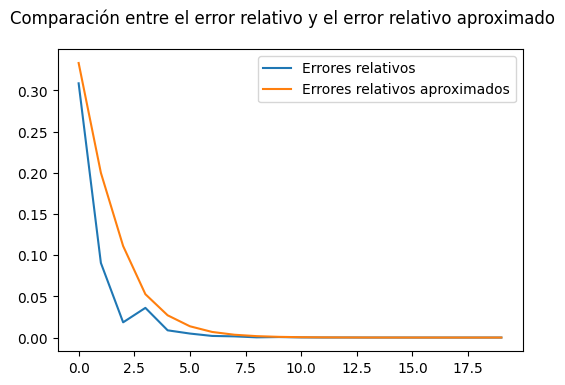

In [17]:
import matplotlib.pyplot as plt

plt.figure(dpi=100)
plt.suptitle("Comparación entre el error relativo y el error relativo aproximado")
plt.plot(range(len(errores_realtivos)),errores_realtivos,label="Errores relativos")
plt.plot(range(len(errores_realtivos)),errores_realtivos_aprox,label="Errores relativos aproximados")
plt.legend(loc='best')
plt.savefig("comparación-errores-bisección.png")
plt.show()

In [33]:
x_0 = -2
x_1 = -1

x_m = x_0

tolerancia = 0.00001

error = 1

while (error>tolerancia):
    x_m_old = x_m
    x_m = (x_0+x_1)/2
    if x_m != 0:
        error = error_relativo(x_m,x_m_old)
    test = f(x_0)*f(x_m)
    if test<0:        
        x_1 = x_m
    elif test>0:
        x_0 = x_m
    else:
        error = 0
    
print(f"Solución aproximada: {x_m}")
print(f"Error relativo aproximado: {error}")
print(f"Evaluación: {f(x_m)}")

Solución aproximada: -1.1461868286132812
Error relativo aproximado: 6.656327171793148e-06
Evaluación: -1.3718418463426474e-05


# Método Bisección & Falsa Posición

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class RootFinder:

    def __init__(self):
        pass

    def fit(self,f,x0,x1,tolerance,method='bisection'):
        self.x0 = x0
        self.x1 = x1
        self.root = x0
        self.f = f
        self.tolerance = tolerance
        self.method = method
        self.n_iterations = 0
        self.errors = []
        self.roots = []
        self.__check()
        error = x1-x0
        while (error>self.tolerance):
            root_old = self.root
            if method=='bisection':
                self.root = 0.5*(x0 + x1)
            elif method=='false-position':
                self.root = x1 - (self.f(x1)*(x0-x1))/(self.f(x0)-self.f(x1))
            self.roots.append(self.root)
            if self.root != 0:
                error = self.__relative_error(self.root,root_old)
            test = self.f(x0)*self.f(self.root)
            if test<0:        
                x1 = self.root
            elif test>0:
                x0 = self.root
            else:
                error = 0
            self.errors.append(error)
            self.n_iterations += 1
        return self.root
    
    def __check(self):
        assert self.x1>self.x0
        assert self.method=='bisection' or self.method=='false-position'
    
    def __relative_error(self,x_real,x_aprox):
        return abs(x_real-x_aprox)/abs(x_real)


def plot_comparison(rf1,rf2,root_real,labels=["Bisección","Posición Falsa"],id=""):
    common_iterations = min(rf1.n_iterations,rf2.n_iterations)
    x_axis = list(range(common_iterations))
    #------ plot comparison of aproximate errors -------
    errors1, errors2 = rf1.errors, rf2.errors
    plt.figure(dpi=100)
    plt.suptitle("Comparación entre los error relativos aproximados")
    plt.plot(x_axis,errors1[:common_iterations],label=labels[0])
    plt.plot(x_axis,errors2[:common_iterations],label=labels[1])
    plt.legend(loc='best')
    plt.xlabel("Iteraciones")
    plt.xticks(x_axis)
    plt.ylabel("Errores relativos")
    plt.savefig(f"comparación-errores-{id}.png")
    plt.show()
    #------ plot comparison of aproximate roots -------
    assert (rf1.x0,rf1.x1)==(rf2.x0,rf2.x1)
    (x0,x1) = (rf1.x0,rf1.x1)
    x_axis_cont = np.linspace(x0,x1,50)
    plt.figure(dpi=100)
    plt.suptitle(f"Aproximaciones ({labels[0]})")
    plt.plot(x_axis_cont,[f(x) for x in x_axis_cont],color='green')
    plt.plot(x_axis_cont,[0 for x in x_axis_cont],color='black')
    plt.scatter(rf1.roots,[0 for x in rf1.roots],color='red',alpha=0.5)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.savefig(f"aproximaciones-raices-1-{id}.png")
    plt.show()
    plt.figure(dpi=100)
    plt.suptitle(f"Aproximaciones ({labels[1]})")
    plt.plot(x_axis_cont,[f(x) for x in x_axis_cont],color='green')
    plt.plot(x_axis_cont,[0 for x in x_axis_cont],color='black')
    plt.scatter(rf2.roots,[0 for x in rf2.roots],color='red')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.savefig(f"aproximaciones-raices-2-{id}.png")
    plt.show()
    #------ plot comparison of real errors -------
    errores_reales1 = [abs(x-root_real) for x in rf1.roots]
    errores_reales2 = [abs(x-root_real) for x in rf2.roots]
    plt.figure(dpi=100)
    plt.suptitle("Comparación entre los error absolutos reales")
    plt.plot(x_axis,errores_reales1[:common_iterations],label=labels[0])
    plt.plot(x_axis,errores_reales2[:common_iterations],label=labels[1])
    plt.legend(loc='best')
    plt.xlabel("Iteraciones")
    plt.xticks(x_axis)
    plt.ylabel("Errores reales")
    plt.savefig(f"comparación-reales-{id}.png")
    plt.show()    


In [4]:
from numpy import e
from math import sqrt

x_0 = 1
x_1 = 3
tolerancia = 0.05

def f(x):
    return 3-e**(-x)-x

rf_bs = RootFinder()
root_bs = rf_bs.fit(f,x0=x_0,x1=x_1,tolerance=tolerancia,method='bisection')
errors_bs = rf_bs.errors

print("-------- Método Bisección --------")
print(f"Iteraciones: {rf_bs.n_iterations}")
print(f"Solución aproximada: {root_bs}")
print(f"Error relativo aproximado: {errors_bs[-1]}")
print(f"Evaluación: {f(root_bs)}")

rf_fp = RootFinder()
root_fp = rf_fp.fit(f,x0=x_0,x1=x_1,tolerance=tolerancia,method='false-position')
errors_fp = rf_fp.errors

print("-------- Método Falsa Posición --------")
print(f"Iteraciones: {rf_fp.n_iterations}")
print(f"Solución aproximada: {root_fp}")
print(f"Error relativo aproximado: {errors_fp[-1]}")
print(f"Evaluación: {f(root_fp)}")

# root_real = -1.14619

# plot_comparison(rf1=rf_bs,
#                 rf2=rf_fp,
#                 root_real=root_real,
#                 id="ejemplo-clase")

-------- Método Bisección --------
Iteraciones: 4
Solución aproximada: 2.875
Error relativo aproximado: 0.043478260869565216
Evaluación: 0.06858386049622256
-------- Método Falsa Posición --------
Iteraciones: 2
Solución aproximada: 2.9475212790230643
Error relativo aproximado: 0.0022813656659577395
Evaluación: 9.11857942353933e-06


In [5]:
rf_bs.roots

[2.0, 2.5, 2.75, 2.875]

In [6]:
rf_fp.roots

[2.940796905177421, 2.9475212790230643]

In [4]:
from roots import RootFinder
from numpy import e

x_0 = 1
x_1 = 3
tolerancia = 0.0005

def f(x):
    return 3-e**(-x)-x

def df(x):
    return -1+e**(-x)

rf = RootFinder()
rf.fit(f=f,x0=x_0,x1=x_1,tolerance=tolerancia,method='secant',df=df)
rf.print_table(digits=7)

Possible methods: ['bisection', 'false-position', 'fix', 'newton', 'secant']


,n_iter,root,error,f(x)
0,1,2.940797,0.659956,0.006379
1,2,2.947521,0.002281,0.000009
2,3,2.947531,0.000003,-0.000000


-------- Método Bisección --------
Iteraciones: 18
Solución aproximada: 1.0000019073486328
Error relativo aproximado: 5.722034984521895e-06
Evaluación: 1.9073650038059498e-05
-------- Método Bisección --------
Iteraciones: 133
Solución aproximada: 0.9998971708232889
Error relativo aproximado: 9.949253374848845e-06
Evaluación: -0.0010278160747823062


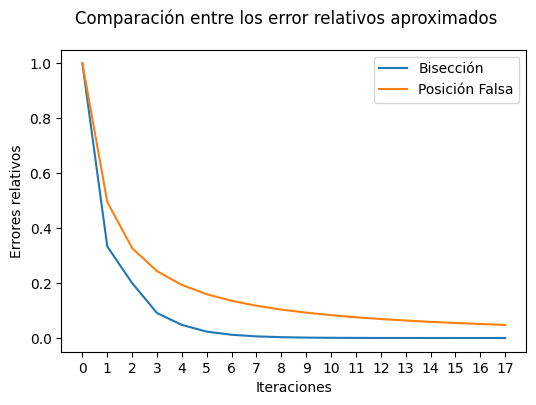

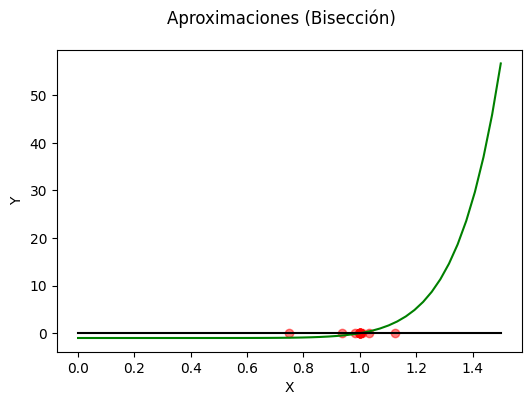

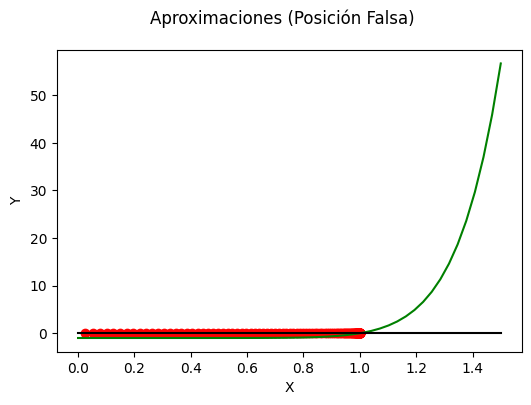

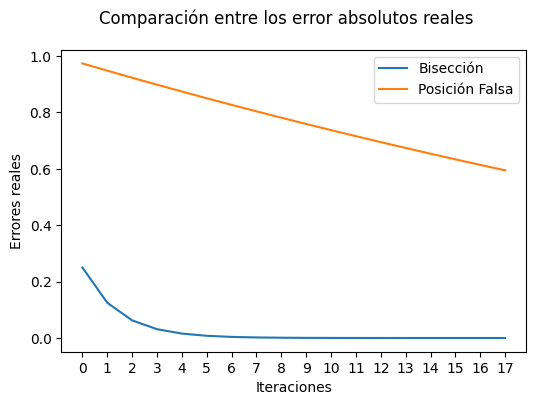

In [56]:
x_0 = 0
x_1 = 1.5
tolerancia = 0.00001

def f(x):
    return x**10 - 1

rf_bs = RootFinder()
root_bs = rf_bs.fit(f,x0=x_0,x1=x_1,tolerance=tolerancia,method='bisection')
errors_bs = rf_bs.errors

print("-------- Método Bisección --------")
print(f"Iteraciones: {rf_bs.n_iterations}")
print(f"Solución aproximada: {root_bs}")
print(f"Error relativo aproximado: {errors_bs[-1]}")
print(f"Evaluación: {f(root_bs)}")

rf_fp = RootFinder()
root_fp = rf_fp.fit(f,x0=x_0,x1=x_1,tolerance=tolerancia,method='false-position')
errors_fp = rf_fp.errors

print("-------- Método Falsa Posición --------")
print(f"Iteraciones: {rf_fp.n_iterations}")
print(f"Solución aproximada: {root_fp}")
print(f"Error relativo aproximado: {errors_fp[-1]}")
print(f"Evaluación: {f(root_fp)}")

root_real = 1

plot_comparison(rf1=rf_bs,
                rf2=rf_fp,
                root_real=root_real,
                id="ejemplo-potencia-10")    